In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

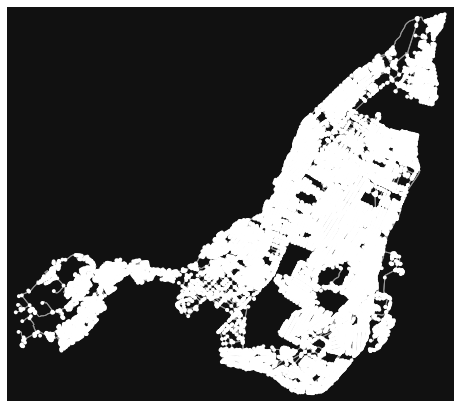

In [12]:
# download/model Montreal street network then visualize it
G = ox.graph_from_place("Montréal, QC, Canada", network_type="drive")
fig, ax = ox.plot_graph(G)

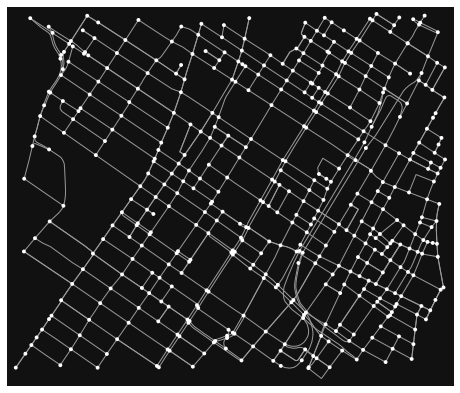

In [25]:
# define a bounding box Centre-ville, Montréal, QC, Canada
north, east = 45.512984, -73.553328
south, west = 45.496527, -73.581779

# create network from that bounding box
subG = ox.graph_from_bbox(north, south, east, west, network_type="drive")
fig, ax = ox.plot_graph(subG)

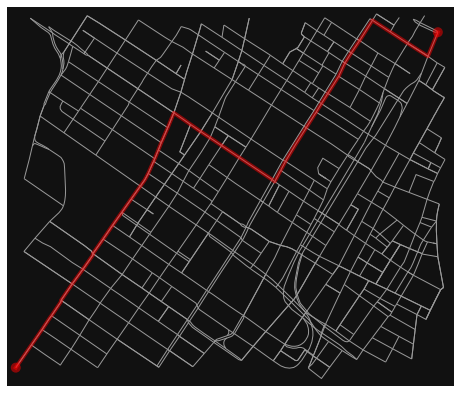

In [26]:
# impute missing edge speeds and calculate edge travel times with the speed module
subG = ox.speed.add_edge_speeds(subG)
subG = ox.speed.add_edge_travel_times(subG)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(subG, X=-73.581779, Y=45.496527)
dest = ox.distance.nearest_nodes(subG, X=-73.553328, Y=45.512984)

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(subG, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(subG, route, node_size=0)